In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
import yfinance as yf

In [68]:
americanas = yf.download('AMER3.SA', start='2021-01-01', end='2022-02-01')
americanas

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-03:00,76.910004,77.029999,73.849998,75.180000,73.699677,2820700
2021-01-05 00:00:00-03:00,75.230003,75.290001,72.650002,73.500000,72.052757,3881300
2021-01-06 00:00:00-03:00,73.459999,73.599998,68.589996,68.699997,67.347267,7548200
2021-01-07 00:00:00-03:00,68.910004,70.419998,66.860001,67.309998,65.984634,8573900
2021-01-08 00:00:00-03:00,67.800003,72.580002,67.400002,72.000000,70.582291,7263500
...,...,...,...,...,...,...
2022-01-25 00:00:00-03:00,33.575134,35.106701,32.938641,35.106701,34.415436,10064511
2022-01-26 00:00:00-03:00,35.375225,35.832706,33.644753,33.953053,33.284504,9607710
2022-01-27 00:00:00-03:00,34.500042,34.500042,33.167381,33.286724,32.631294,7352058


In [69]:
americanas.index

DatetimeIndex(['2021-01-04 00:00:00-03:00', '2021-01-05 00:00:00-03:00',
               '2021-01-06 00:00:00-03:00', '2021-01-07 00:00:00-03:00',
               '2021-01-08 00:00:00-03:00', '2021-01-11 00:00:00-03:00',
               '2021-01-12 00:00:00-03:00', '2021-01-13 00:00:00-03:00',
               '2021-01-14 00:00:00-03:00', '2021-01-15 00:00:00-03:00',
               ...
               '2022-01-18 00:00:00-03:00', '2022-01-19 00:00:00-03:00',
               '2022-01-20 00:00:00-03:00', '2022-01-21 00:00:00-03:00',
               '2022-01-24 00:00:00-03:00', '2022-01-25 00:00:00-03:00',
               '2022-01-26 00:00:00-03:00', '2022-01-27 00:00:00-03:00',
               '2022-01-28 00:00:00-03:00', '2022-01-31 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=268, freq=None)

In [79]:
#americanas['Close'].rolling(window= 5 ).mean().head(40)

In [80]:
MME_speed = 7
MME_low = 21

MME_1 = americanas['Close'].ewm(span= MME_speed, adjust=False).mean()
MME_2 = americanas['Close'].ewm(span= MME_low, adjust=False).mean()

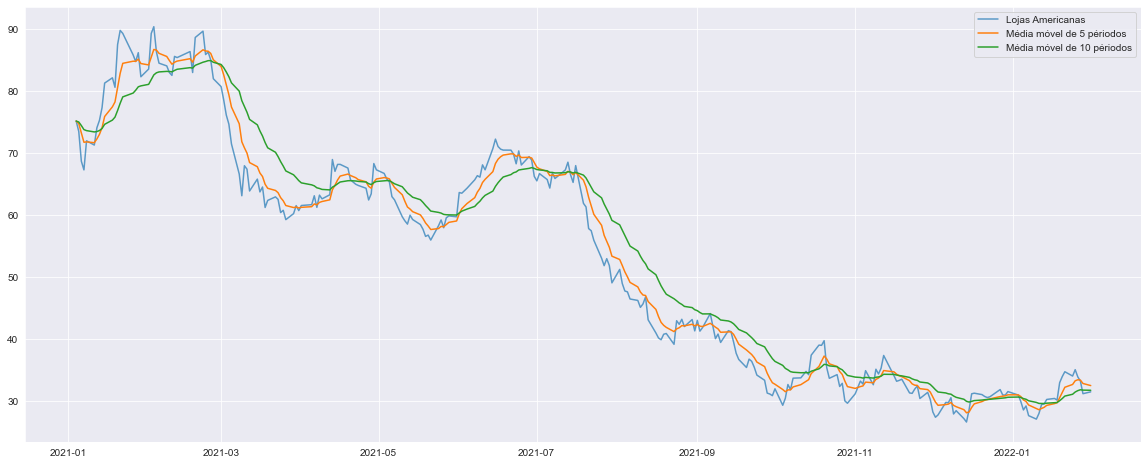

In [81]:
plt.figure(figsize=(20,8))

plt.plot(americanas['Close'], label ='Lojas Americanas', alpha= 0.7)
plt.plot(MME_1, label = 'Média móvel de 5 périodos')
plt.plot(MME_2, label = 'Média móvel de 10 périodos')


plt.legend()

In [82]:
americanas['MME_1'] = MME_1
americanas['MME_2'] = MME_2
americanas

,Open,High,Low,Close,Adj Close,Volume,MME_1,MME_2,Sinal compra,Sinal venda
Date,,,,,,,,,,
2021-01-04 00:00:00-03:00,76.910004,77.029999,73.849998,75.180000,73.699677,2820700,75.180000,75.180000,NaN,NaN
2021-01-05 00:00:00-03:00,75.230003,75.290001,72.650002,73.500000,72.052757,3881300,74.760000,75.027273,NaN,73.50000
2021-01-06 00:00:00-03:00,73.459999,73.599998,68.589996,68.699997,67.347267,7548200,73.244999,74.452066,NaN,NaN
2021-01-07 00:00:00-03:00,68.910004,70.419998,66.860001,67.309998,65.984634,8573900,71.761249,73.802787,NaN,NaN
2021-01-08 00:00:00-03:00,67.800003,72.580002,67.400002,72.000000,70.582291,7263500,71.820937,73.638897,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-25 00:00:00-03:00,33.575134,35.106701,32.938641,35.106701,34.415436,10064511,33.321613,31.506247,NaN,NaN
2022-01-26 00:00:00-03:00,35.375225,35.832706,33.644753,33.953053,33.284504,9607710,33.479473,31.728684,NaN,NaN
2022-01-27 00:00:00-03:00,34.500042,34.500042,33.167381,33.286724,32.631294,7352058,33.431286,31.870324,NaN,NaN


In [83]:
def cruzamento(df):
    
    sinal_compra = []
    sinal_venda = []
    marcador = 0
    
    for i in range(0, len(df)):
        if df['MME_1'][i] > df['MME_2'][i]: 
            if marcador != 1:   
                sinal_compra.append(df['Close'][i])
                sinal_venda.append(np.nan)
                marcador = 1 
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan) 
        elif df['MME_1'][i] < df['MME_2'][i]:
            if marcador != 2:
                sinal_compra.append(np.nan)
                sinal_venda.append(df['Close'][i])
                marcador = 2 
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan)
        else:
            sinal_compra.append(np.nan)
            sinal_venda.append(np.nan)
    return sinal_compra, sinal_venda


In [84]:
cruzamento(americanas)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  77.3499984741211,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  67.06999969482422,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  68.33000183105469,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  63.54999923706055,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  68.55000305175781,
  nan,
  nan,
  nan,


In [85]:
americanas['Sinal compra'] = cruzamento(americanas)[0]
americanas['Sinal venda'] = cruzamento(americanas)[1]

In [86]:
americanas

,Open,High,Low,Close,Adj Close,Volume,MME_1,MME_2,Sinal compra,Sinal venda
Date,,,,,,,,,,
2021-01-04 00:00:00-03:00,76.910004,77.029999,73.849998,75.180000,73.699677,2820700,75.180000,75.180000,NaN,NaN
2021-01-05 00:00:00-03:00,75.230003,75.290001,72.650002,73.500000,72.052757,3881300,74.760000,75.027273,NaN,73.5
2021-01-06 00:00:00-03:00,73.459999,73.599998,68.589996,68.699997,67.347267,7548200,73.244999,74.452066,NaN,NaN
2021-01-07 00:00:00-03:00,68.910004,70.419998,66.860001,67.309998,65.984634,8573900,71.761249,73.802787,NaN,NaN
2021-01-08 00:00:00-03:00,67.800003,72.580002,67.400002,72.000000,70.582291,7263500,71.820937,73.638897,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-25 00:00:00-03:00,33.575134,35.106701,32.938641,35.106701,34.415436,10064511,33.321613,31.506247,NaN,NaN
2022-01-26 00:00:00-03:00,35.375225,35.832706,33.644753,33.953053,33.284504,9607710,33.479473,31.728684,NaN,NaN
2022-01-27 00:00:00-03:00,34.500042,34.500042,33.167381,33.286724,32.631294,7352058,33.431286,31.870324,NaN,NaN


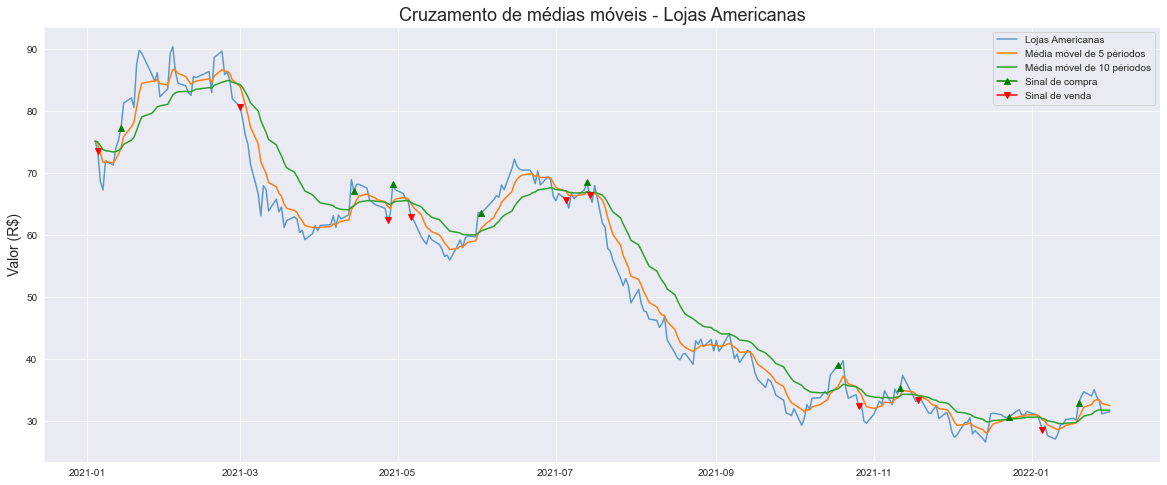

In [87]:
plt.figure(figsize=(20,8))

plt.plot(americanas['Close'], label ='Lojas Americanas', alpha= 0.7)
plt.plot(americanas['MME_1'], label = 'Média móvel de 5 périodos')
plt.plot(americanas['MME_2'], label = 'Média móvel de 10 périodos')
plt.plot(americanas['Sinal compra'], marker = '^', color = 'green', label = 'Sinal de compra')
plt.plot(americanas['Sinal venda'], marker = 'v',  color = 'red', label = 'Sinal de venda')

plt.title('Cruzamento de médias móveis - Lojas Americanas', fontsize = 18)
plt.ylabel('Valor (R$)', fontsize = 14)
plt.legend()